In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Clustering Libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans

from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram

In [3]:
data=pd.read_csv('../input/wholesale-customers-data-set/Wholesale customers data.csv')
data.drop(labels=(['Channel','Region']),axis=1,inplace=True)
data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [4]:
# Basic data Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(6)
memory usage: 20.8 KB


In [5]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
#Standardisation and decomposition

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

PCA_train = PCA(2).fit_transform(scaled_data)

print(scaled_data)



[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 ...
 [ 0.20032554  1.31467078  2.34838631 -0.54337975  2.51121768  0.12145607]
 [-0.13538389 -0.51753572 -0.60251388 -0.41944059 -0.56977032  0.21304614]
 [-0.72930698 -0.5559243  -0.57322717 -0.62009417 -0.50488752 -0.52286938]]


In [7]:

ps = pd.DataFrame(PCA_train)
ps.head()

,0,1
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434


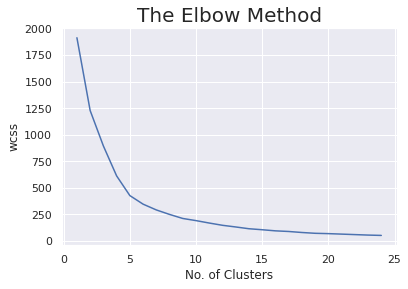

<Figure size 720x360 with 0 Axes>

In [8]:
#Elbow Method
wcss = []
for i in range(1, 25):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                max_iter = 300, n_init = 10, random_state = 0)
    km.fit(ps)
    wcss.append(km.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.figure(figsize = (10,5))
plt.show()

In [9]:
#Silhouette Method
no_of_clusters = [4, 5, 6,7] 
print("Average Silhouette Method\n")
for n_clusters in no_of_clusters: 
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(ps) 
    silhouette_avg = silhouette_score(ps, cluster_labels)
    print("For no of clusters =", n_clusters, 
          "The average silhouette_score is :", silhouette_avg) 


Average Silhouette Method

For no of clusters = 4 The average silhouette_score is : 0.48521964473348217
For no of clusters = 5 The average silhouette_score is : 0.4858297956992906
For no of clusters = 6 The average silhouette_score is : 0.4689672558681789
For no of clusters = 7 The average silhouette_score is : 0.4212696612483143


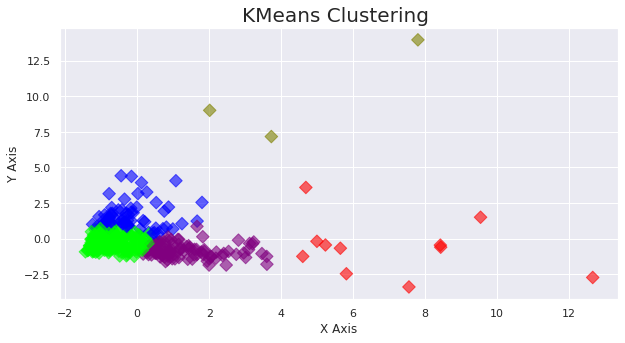

In [10]:
#K Means Clustering
kmean = KMeans(n_clusters=5, random_state=0).fit(ps)
y_kmeans = kmean.predict(ps)
lab = kmean.labels_

plt.figure(figsize=(10,5))
plt.title("KMeans Clustering ",fontsize=20)
plt.scatter(ps[0], ps[1],c = y_kmeans, s=80, 
            cmap='brg',alpha=0.6,marker='D')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

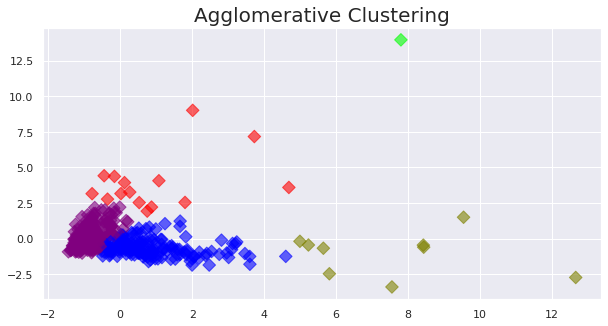

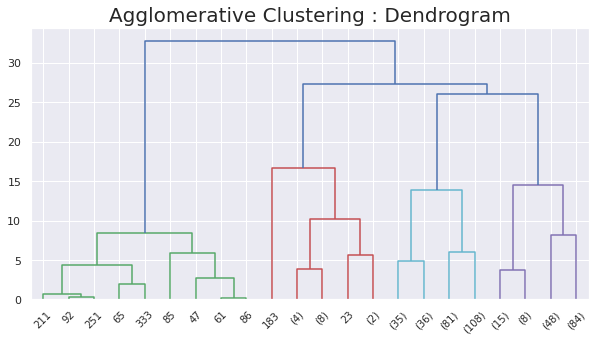

In [11]:
#Agglomerative Clustering

agc = AgglomerativeClustering(n_clusters=5,affinity = 'euclidean',linkage = 'ward')
y_agc_pred = agc.fit_predict(ps)
plt.figure(figsize =(10,5))
plt.scatter(ps[0], ps[1],c = y_agc_pred, s=80, cmap='brg',alpha=0.6,marker='D')
plt.title('Agglomerative Clustering',fontsize = 20)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Agglomerative Clustering : Dendrogram',fontsize = 20)
dend=shc.dendrogram(shc.linkage(ps,method='ward') ,truncate_mode='level', p=4) 
plt.show()


In [12]:
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit_predict(ps)

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 0, 1, 3,
       0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 2,
       1, 1, 1, 1, 3, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 2, 0, 4, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

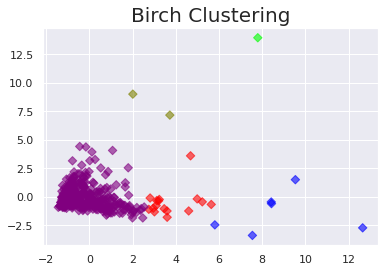

In [13]:
#birch clustering
brc = Birch(branching_factor=500, n_clusters=5, threshold=1.5)
brc.fit(ps)
labels = brc.predict(ps)

plt.title('Birch Clustering',fontsize = 20)
plt.scatter(ps[0], ps[1], c=labels, cmap='brg',alpha=0.6,marker='D')


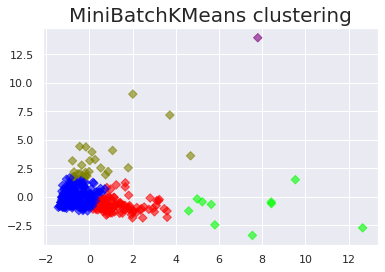

<Figure size 1440x1080 with 0 Axes>

In [14]:
mb = MiniBatchKMeans(n_clusters=5, random_state=0)
mb.fit(ps)

labels = mb.predict(ps)
plt.title('MiniBatchKMeans clustering',fontsize = 20)
plt.scatter(ps[0], ps[1], c=labels, cmap='brg',alpha=0.6,marker='D')
plt.figure(figsize=(20,15))
plt.show()

